In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data= pd.read_csv("../input/creditcardfraud/creditcard.csv")



In [3]:
data.head()
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

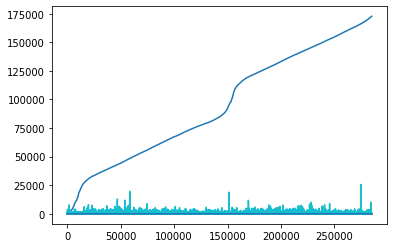

In [6]:
plt.plot(data)
plt.show()

In [7]:
data1=data.sample(frac=0.5)
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33057,37072.0,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,...,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,32.10,0
77801,57215.0,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,...,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,5.00,0
260775,159721.0,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,...,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,9.95,0
271824,164767.0,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,...,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,1.00,0
66412,52038.0,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,...,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,412.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37977,39194.0,1.057391,-0.854105,1.134898,0.811819,-1.574058,-0.174816,-0.843187,0.041459,-0.300440,...,-0.173369,-0.129427,-0.103279,0.362435,0.343640,-0.251889,0.070122,0.059906,120.00,0
62801,50437.0,0.420752,-2.016922,0.504443,-0.754293,-1.869756,-0.377753,-0.305057,0.106385,2.399183,...,0.076845,-0.369980,-0.253412,0.433074,0.090799,-0.128339,-0.019541,0.088327,400.82,0
214970,139886.0,2.058027,0.198992,-1.711293,0.534048,0.144109,-1.521846,0.260195,-0.383476,0.623972,...,0.192178,0.721235,-0.020053,-0.048453,0.248324,-0.101756,-0.003774,-0.031707,3.59,0
61221,49715.0,-0.355573,0.921295,0.936913,-0.405317,0.734703,0.364477,0.565208,0.194838,-0.213524,...,-0.299080,-0.786717,-0.156763,-1.364037,-0.100199,0.189677,0.275864,0.102066,3.96,0


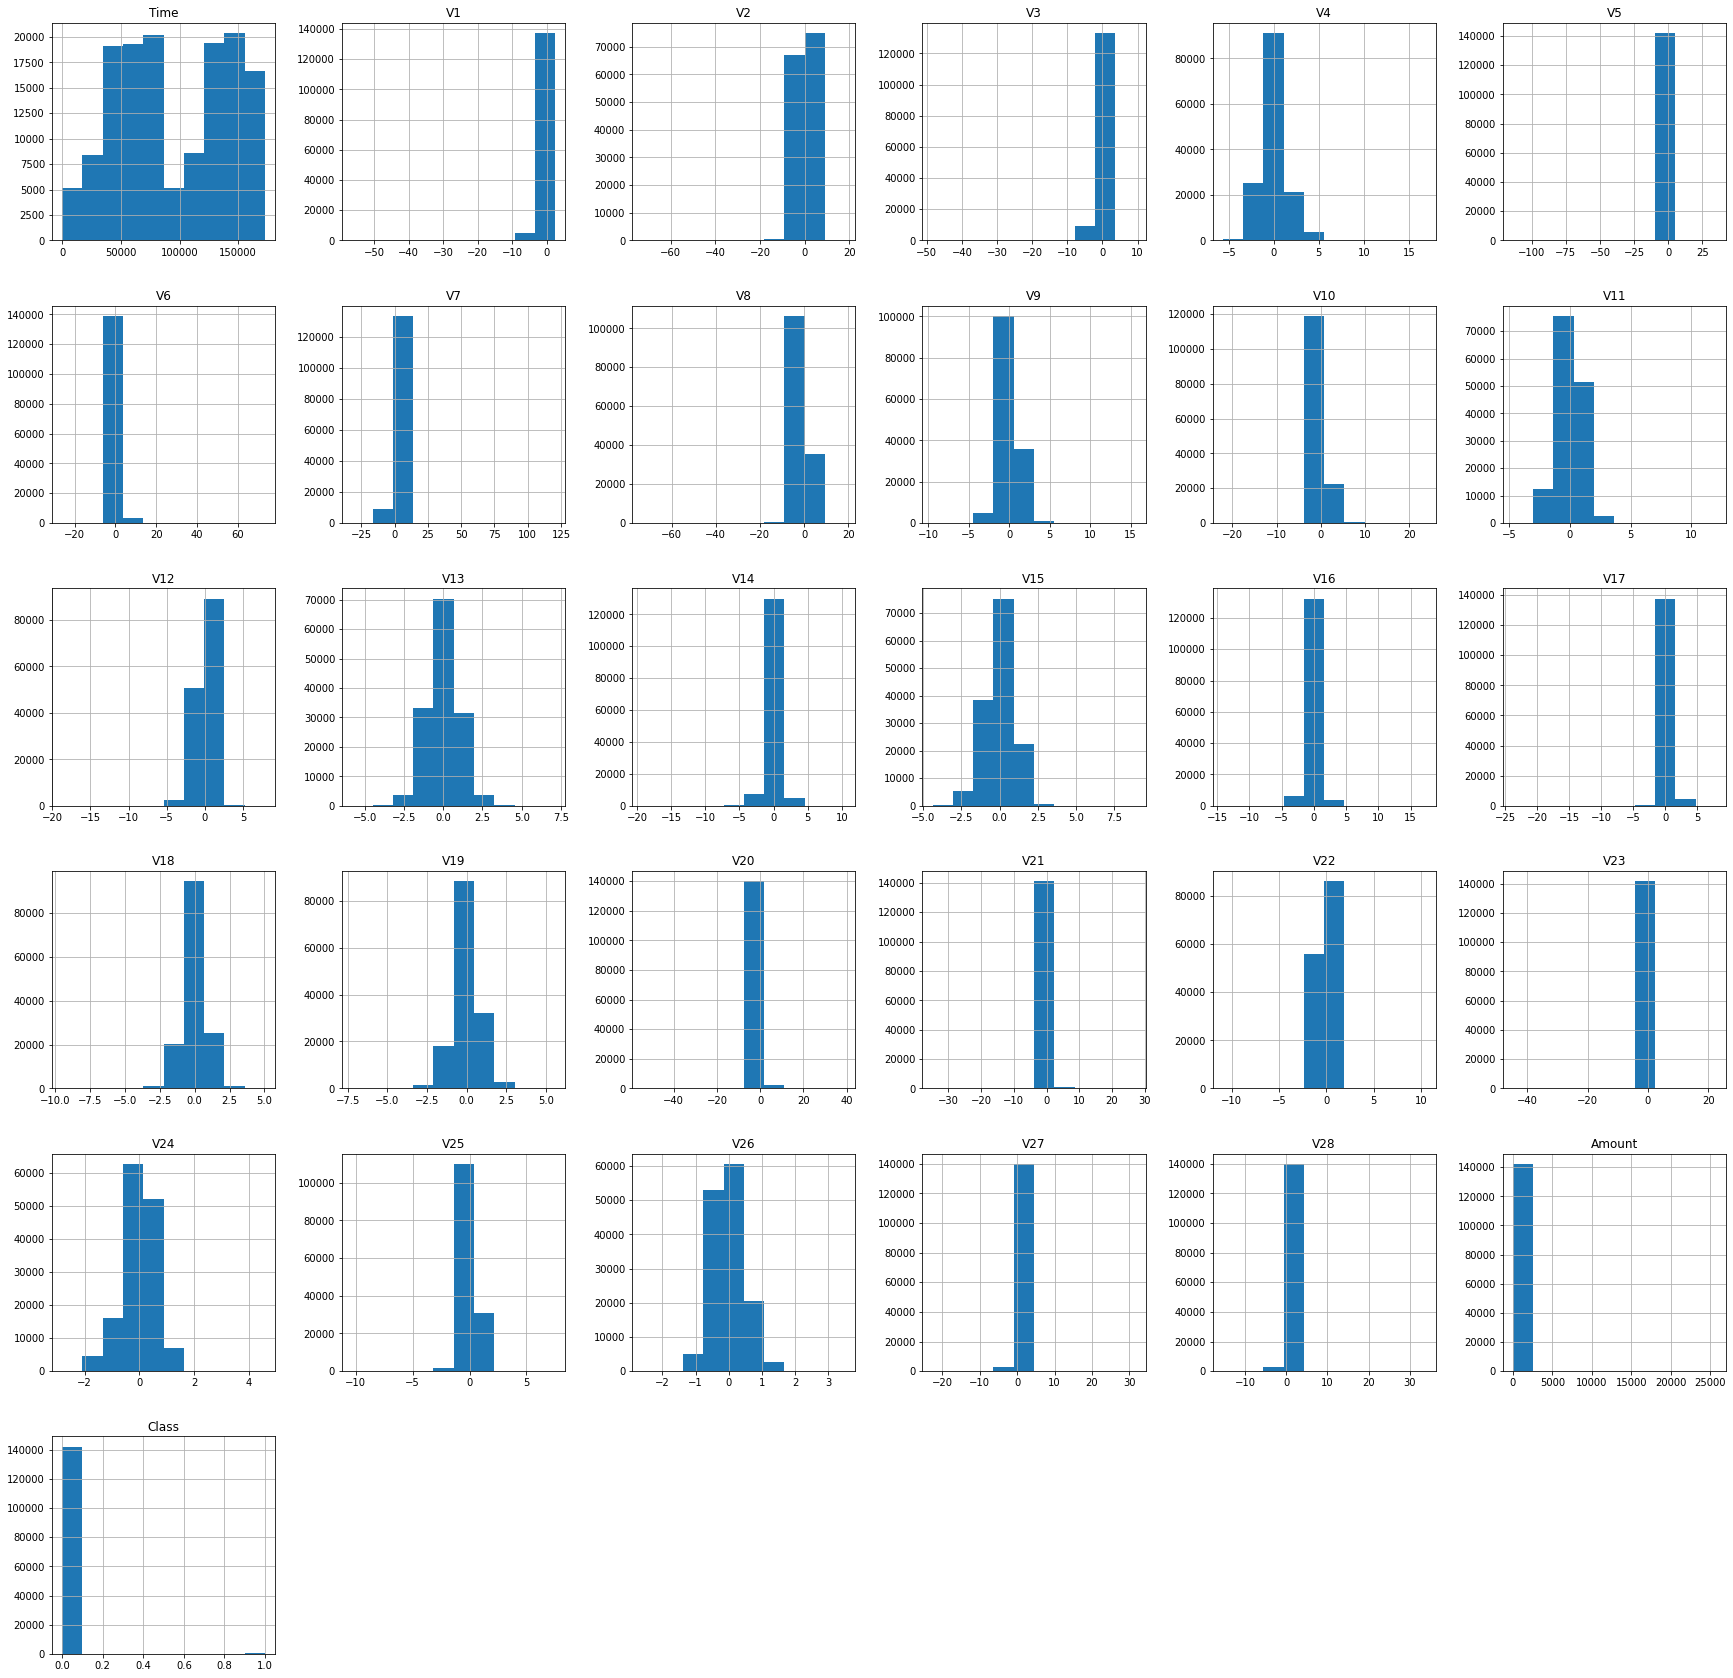

In [8]:
#visualising the histogram of the features.
data1.hist(figsize=(30,30))
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
data1['Amount']=sc.fit_transform(pd.DataFrame(data1['Amount']))

In [11]:
data1['Amount']

33057    -0.218008
77801    -0.321640
260775   -0.302711
271824   -0.336937
66412     1.235872
            ...   
37977     0.118130
62801     1.192009
214970   -0.327032
61221    -0.325617
219168   -0.073266
Name: Amount, Length: 142404, dtype: float64

In [12]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33057,37072.0,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,...,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,-0.218008,0
77801,57215.0,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,...,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,-0.321640,0
260775,159721.0,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,...,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,-0.302711,0
271824,164767.0,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,...,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,-0.336937,0
66412,52038.0,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,...,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,1.235872,0


In [13]:
data2 = data1.drop(['Time'],axis=1)

In [14]:
data2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33057,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,-0.425471,...,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,-0.218008,0
77801,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,0.838811,...,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,-0.321640,0
260775,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,-0.294391,...,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,-0.302711,0
271824,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,0.162078,...,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,-0.336937,0
66412,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,-1.458288,...,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,1.235872,0


In [15]:
data2.shape

(142404, 30)

In [16]:
data2.duplicated().any()

True

In [17]:
data3= data2.drop_duplicates()

In [18]:
data3.shape

(139372, 30)

In [19]:
totaldata=142404
removeduplicatedata=13952
duplicate=142404-139352
percentageofduplicate=(duplicate/totaldata)*100
print("Percentage: {:.2f}%".format(percentageofduplicate))

Percentage: 2.14%


In [20]:
data3['Class'].value_counts()

0    139134
1       238
Name: Class, dtype: int64

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

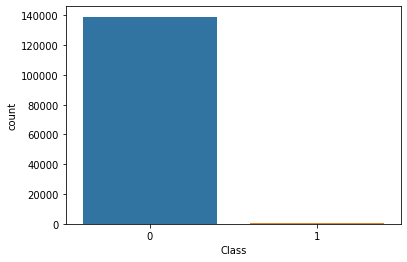

In [22]:

sns.countplot(x=data3['Class'])

(0.0, 5000.0)

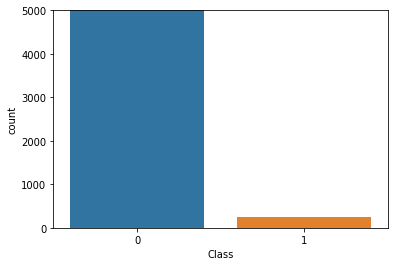

In [23]:

sns.countplot(x=data3['Class'],linewidth=1)
plt.ylim(0, 5000 )


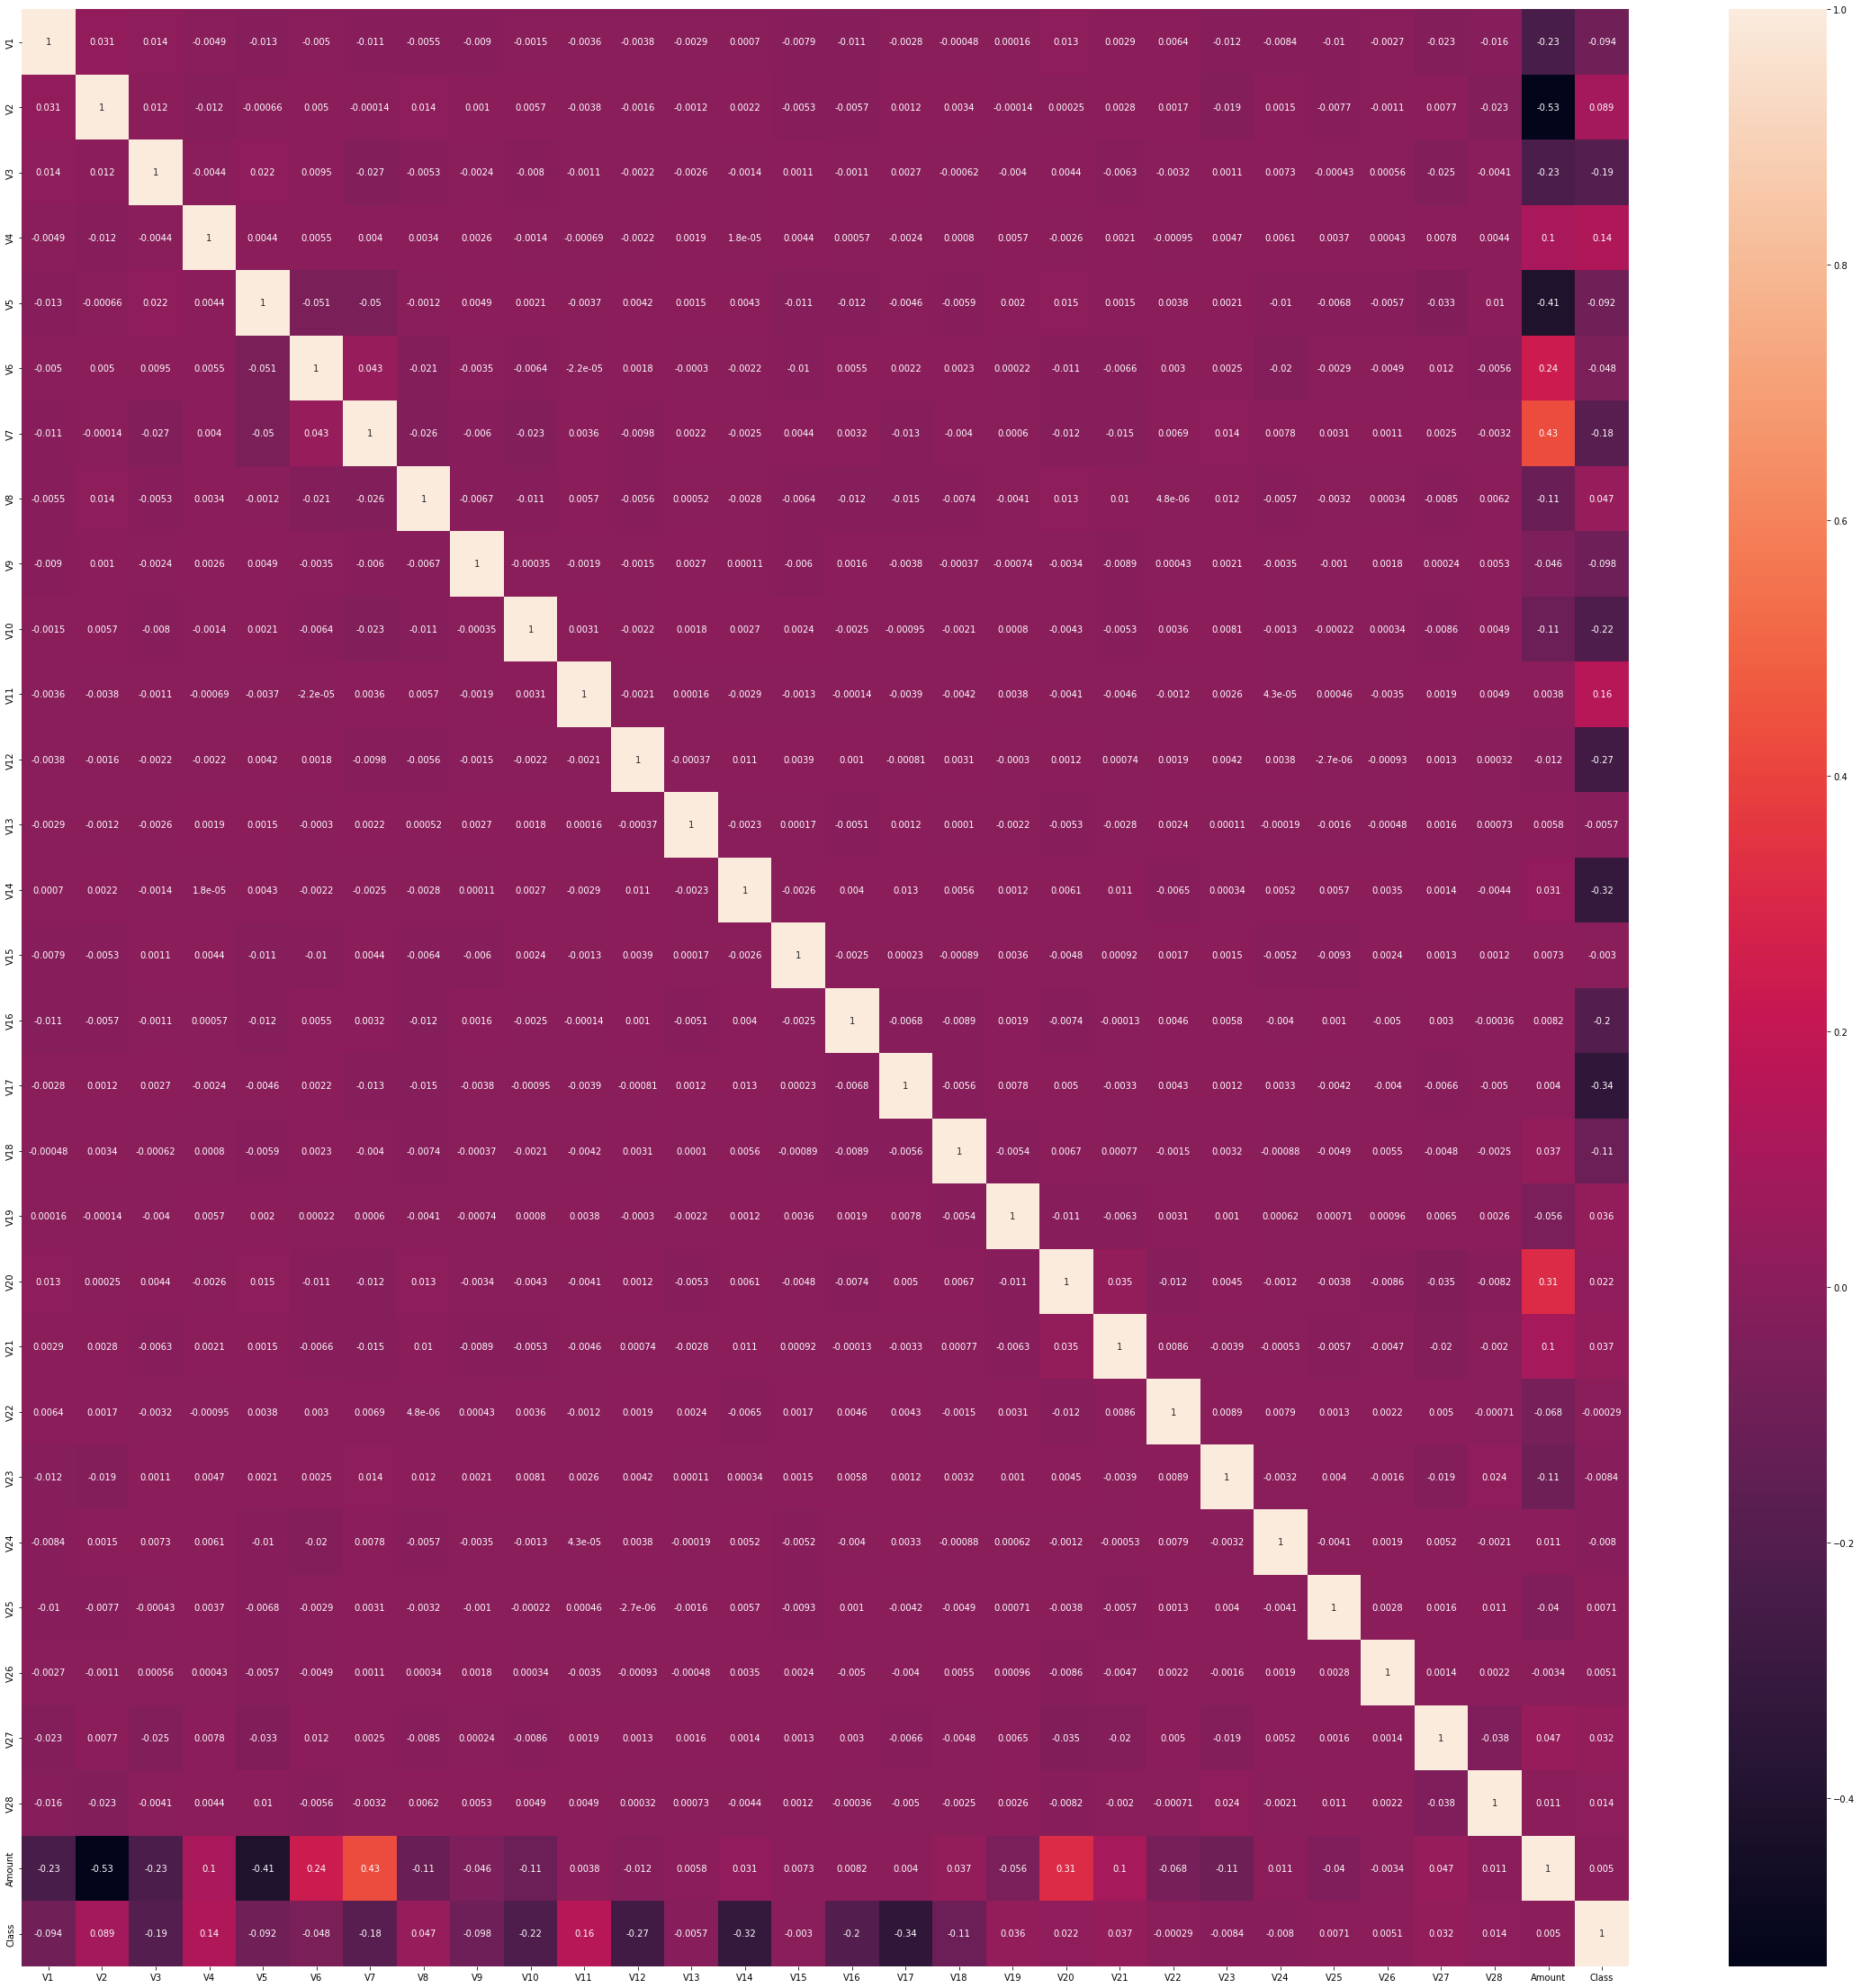

In [24]:
#Visualising the heat map of the correlation matrix of the features
corelate=data3.corr()
fig=plt.figure(figsize=(40,40))
heatmap=sns.heatmap(corelate,annot=True)

plt.show()

In [25]:
X=data3.drop(columns='Class',axis=1)
y=data3['Class']

In [26]:
from sklearn.model_selection import train_test_split

# splitting the X an y for evaluating the model.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33057,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,-0.425471,...,0.056484,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,-0.218008
77801,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,0.838811,...,0.202416,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,-0.321640
260775,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,-0.294391,...,-0.173253,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,-0.302711
271824,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,0.162078,...,-0.198358,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,-0.336937
66412,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,-1.458288,...,-0.639034,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,1.235872


In [28]:
y.head()

33057     0
77801     0
260775    0
271824    0
66412     0
Name: Class, dtype: int64

undersampling

In [29]:
normal = data3[data3['Class']==0]
fraud = data3[data3['Class']==1]

In [30]:
normal.shape

(139134, 30)

In [31]:
fraud.shape

(238, 30)

In [32]:
normal_sample=normal.sample(n=473)

In [33]:
normal_sample.shape

(473, 30)

In [34]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [35]:
new_data['Class'].value_counts()

0    473
1    238
Name: Class, dtype: int64

In [36]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.400626,0.108939,1.420770,-0.761630,0.492432,-1.132929,1.047614,-0.082594,-0.477784,-0.794136,...,-0.378737,-1.536727,0.333931,-0.022857,0.219562,0.153738,0.133137,0.136043,0.173349,0
1,-0.474564,1.081039,-0.948067,-0.976899,1.555452,1.305063,0.527485,0.608709,-0.105246,0.037232,...,0.411977,1.615189,-0.081227,-0.906127,-0.868381,-0.160330,0.371419,0.074449,-0.312080,0
2,2.183041,-0.789016,-1.372009,-0.676617,-0.721816,-0.768975,-0.998453,-0.042727,0.351110,0.130303,...,0.176525,0.529402,0.036629,-0.796001,-0.111882,-0.041930,0.017574,-0.021447,-0.264470,0
3,-1.315509,0.902687,0.732330,-1.196479,1.350401,0.678378,1.005159,-0.131380,-0.134318,0.315006,...,-0.575357,-1.629587,-0.098155,-1.764276,0.287682,-0.047248,-0.696402,-0.117234,-0.253189,0
4,-0.703352,0.212078,0.317932,0.407631,0.909578,0.163240,1.376664,-0.076724,-0.262927,-0.770072,...,0.311850,0.758891,0.099493,0.425624,0.178481,-0.547164,0.127739,0.198725,0.300768,0


In [37]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [38]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.400626,0.108939,1.420770,-0.761630,0.492432,-1.132929,1.047614,-0.082594,-0.477784,-0.794136,...,0.533222,-0.378737,-1.536727,0.333931,-0.022857,0.219562,0.153738,0.133137,0.136043,0.173349
1,-0.474564,1.081039,-0.948067,-0.976899,1.555452,1.305063,0.527485,0.608709,-0.105246,0.037232,...,0.044535,0.411977,1.615189,-0.081227,-0.906127,-0.868381,-0.160330,0.371419,0.074449,-0.312080
2,2.183041,-0.789016,-1.372009,-0.676617,-0.721816,-0.768975,-0.998453,-0.042727,0.351110,0.130303,...,-0.046352,0.176525,0.529402,0.036629,-0.796001,-0.111882,-0.041930,0.017574,-0.021447,-0.264470
3,-1.315509,0.902687,0.732330,-1.196479,1.350401,0.678378,1.005159,-0.131380,-0.134318,0.315006,...,-0.084151,-0.575357,-1.629587,-0.098155,-1.764276,0.287682,-0.047248,-0.696402,-0.117234,-0.253189
4,-0.703352,0.212078,0.317932,0.407631,0.909578,0.163240,1.376664,-0.076724,-0.262927,-0.770072,...,0.294079,0.311850,0.758891,0.099493,0.425624,0.178481,-0.547164,0.127739,0.198725,0.300768


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [41]:
#Creating the model using randomforest algorithm

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf=RandomForestClassifier().fit(X_train,y_train)
clf

RandomForestClassifier()

In [42]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [43]:
X_test_pred=clf.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred,y_test))

In [44]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  97.9 %


In [45]:
precision_score(X_test_pred,y_test)

0.9761904761904762

In [46]:
recall_score(X_test_pred,y_test)

0.9534883720930233

In [47]:
f1_score(X_test_pred,y_test)

0.9647058823529412

In [48]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.95      0.98      0.96        42

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.97       143
weighted avg       0.98      0.98      0.98       143



In [49]:
confusion_matrix(y_test,X_test_pred)

array([[99,  2],
       [ 1, 41]])

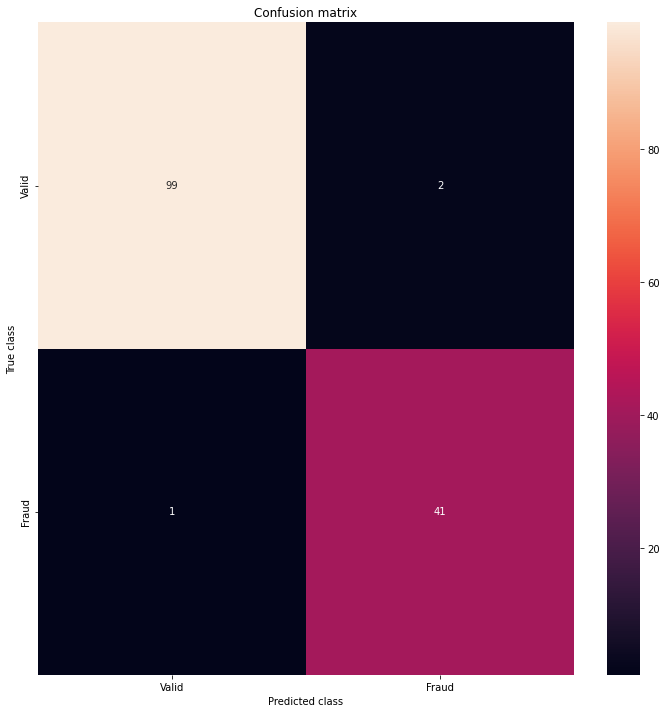

In [50]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

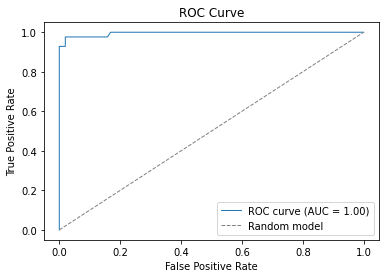

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# assuming that you have a trained model and test data
y_pred = clf.predict_proba(X_test)[:, 1] # probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


using support Decision tree


Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
X_test_pred2=dt.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred2,y_test))

In [55]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  93.01 %


In [56]:
precision_score(X_test_pred2,y_test)

0.9285714285714286

In [57]:
recall_score(X_test_pred2,y_test)

0.8478260869565217

In [58]:
f1_score(X_test_pred2,y_test)

0.8863636363636365

In [59]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       101
           1       0.85      0.93      0.89        42

    accuracy                           0.93       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143



In [60]:
confusion_matrix(y_test,X_test_pred2)

array([[94,  7],
       [ 3, 39]])

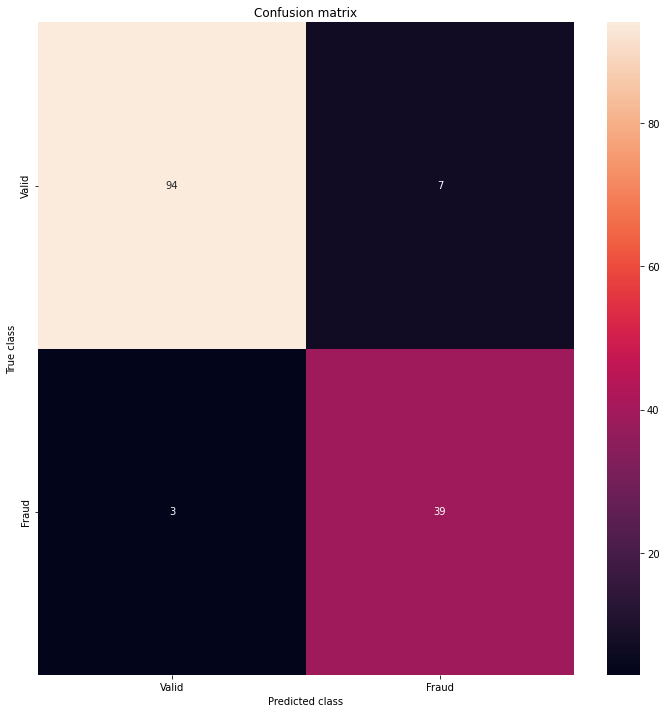

In [61]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred2) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

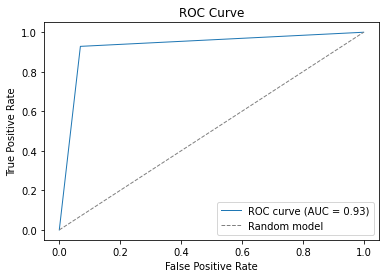

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# assuming that you have a trained model and test data
y_pred = dt.predict_proba(X_test)[:, 1] # probability of positive class
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr2, tpr2)

# plot the ROC curve
plt.plot(fpr2, tpr2, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_train,y_train)

LogisticRegression()

In [66]:
X_test_pred3=lr.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred3,y_test))

In [67]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  96.5 %


In [68]:
precision_score(X_test_pred3,y_test)

0.9761904761904762

In [69]:
recall_score(X_test_pred3,y_test)

0.9111111111111111

In [70]:
f1_score(X_test_pred3,y_test)

0.9425287356321839

In [71]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred3))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.91      0.98      0.94        42

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [72]:
confusion_matrix(y_test,X_test_pred3)

array([[97,  4],
       [ 1, 41]])

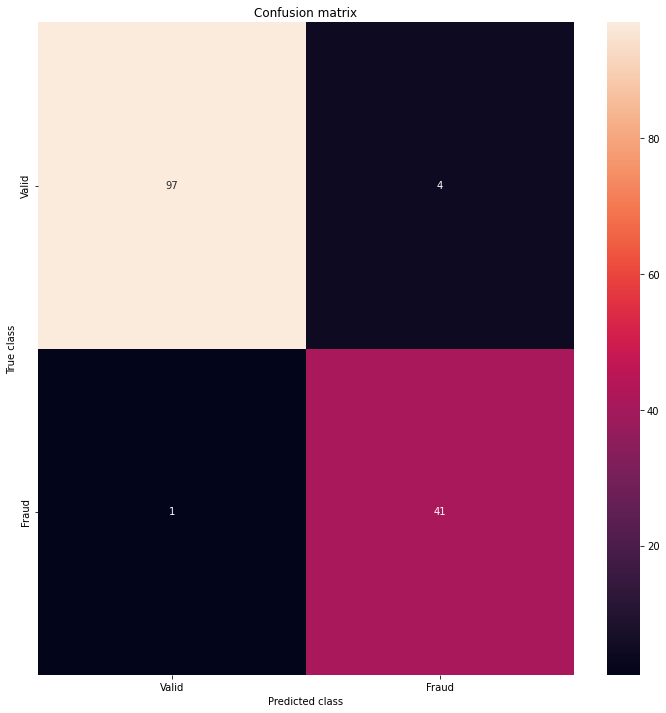

In [73]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred3) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

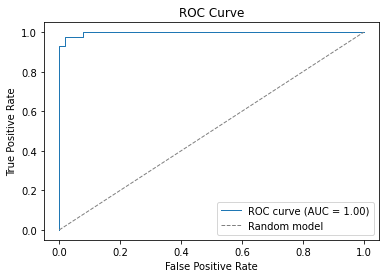

In [74]:

y_pred = lr.predict_proba(X_test)[:, 1] # probability of positive class
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr3, tpr3)

# plot the ROC curve
plt.plot(fpr3, tpr3, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Compare The Accuracy Using Different Algorithm

In [75]:
print("Logistic Regression Test Accuracy:",accuracy_score(X_test_pred3,y_test)*100)

Logistic Regression Test Accuracy: 96.5034965034965


In [76]:
print("Decision Tree Test Accuracy:",accuracy_score(X_test_pred2,y_test)*100)

Decision Tree Test Accuracy: 93.00699300699301


In [77]:
print("Random forest Test Accuracy:",accuracy_score(X_test_pred,y_test)*100)

Random forest Test Accuracy: 97.9020979020979


In [78]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(X_test_pred3,y_test)*100,
                     accuracy_score(X_test_pred2,y_test)*100,
                     accuracy_score(X_test_pred,y_test)*100
                    ]})

In [79]:
final_data

,Models,ACC
0,LR,96.503497
1,DT,93.006993
2,RF,97.902098


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='ACC'>

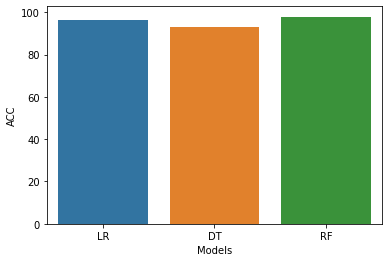

In [80]:
sns.barplot(final_data['Models'],final_data['ACC'])

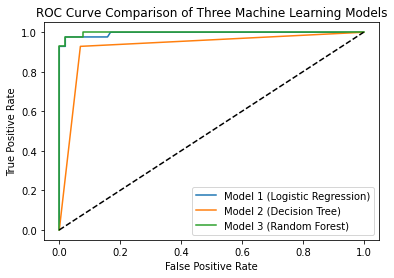

In [81]:


plt.plot(fpr, tpr, label='Model 1 (Logistic Regression)')
plt.plot(fpr2, tpr2, label='Model 2 (Decision Tree)')
plt.plot(fpr3, tpr3, label='Model 3 (Random Forest)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Three Machine Learning Models')
plt.legend(loc='lower right')
plt.show()

oversampling

In [82]:
X = data3.drop('Class',axis=1)
y = data3['Class']

In [83]:
X.shape

(139372, 29)

In [84]:
y.shape

(139372,)

In [85]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33057,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,-0.425471,...,0.056484,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,-0.218008
77801,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,0.838811,...,0.202416,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,-0.321640
260775,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,-0.294391,...,-0.173253,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,-0.302711
271824,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,0.162078,...,-0.198358,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,-0.336937
66412,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,-1.458288,...,-0.639034,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,1.235872


In [86]:
y.head()

33057     0
77801     0
260775    0
271824    0
66412     0
Name: Class, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [89]:
y_res.value_counts()

0    139134
1    139134
Name: Class, dtype: int64

In [90]:
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.986232,0.507744,0.390863,-0.422641,2.803767,3.629755,0.103971,0.924866,-0.561588,-0.425471,...,0.056484,-0.197655,-0.722679,-0.291530,0.983261,0.589568,-0.459858,-0.046027,0.084653,-0.218008
1,-2.699859,2.649306,-0.524958,-0.227972,-1.019859,-1.129049,-0.253163,1.166561,-0.301992,0.838811,...,0.202416,0.143948,0.186584,0.077019,0.536569,-0.098693,0.227054,-0.045710,0.270238,-0.321640
2,-1.518148,0.591204,1.696016,-0.362437,-0.053101,0.371828,-0.206660,0.452349,0.128886,-0.294391,...,-0.173253,0.223536,0.582184,-0.575738,0.811765,0.368418,0.474407,-0.612325,-0.291595,-0.302711
3,2.031983,-0.048029,-1.437108,0.135849,0.320607,-0.549422,0.098101,-0.151413,0.288151,0.162078,...,-0.198358,0.300695,0.977890,0.031136,0.746618,0.246039,-0.159462,-0.023650,-0.061699,-0.336937
4,-1.553169,0.805191,0.712166,-0.014604,-2.849798,0.996928,1.208110,0.662250,0.226320,-1.458288,...,-0.639034,-0.002079,0.264609,0.270500,0.472841,-0.892871,0.095578,-0.045925,-0.102925,1.235872


In [91]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [93]:
#Creating the model using randomforest algorithm

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier().fit(X_train,y_train)
clf

RandomForestClassifier()

In [94]:
X_train_pred=clf.predict(X_train)
train_data_accuracy=(accuracy_score(X_train_pred,y_train))

In [95]:
X_test_pred=clf.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred,y_test))

In [96]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  99.99 %


In [97]:
precision_score(X_test_pred,y_test)

1.0

In [98]:
recall_score(X_test_pred,y_test)

0.9998930176164325

In [99]:
f1_score(X_test_pred,y_test)

0.9999465059467556

In [100]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27615
           1       1.00      1.00      1.00     28039

    accuracy                           1.00     55654
   macro avg       1.00      1.00      1.00     55654
weighted avg       1.00      1.00      1.00     55654



In [101]:
confusion_matrix(y_test,X_test_pred)

array([[27612,     3],
       [    0, 28039]])

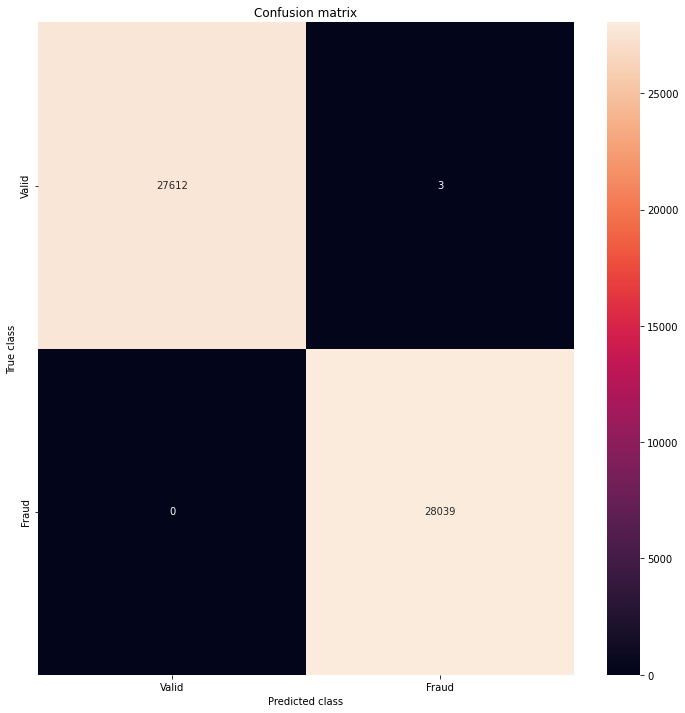

In [102]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

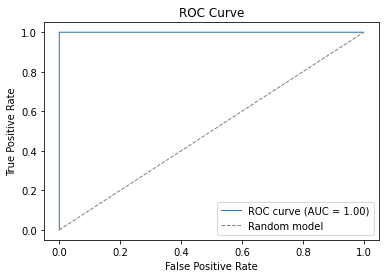

In [103]:

y_pred =clf.predict_proba(X_test)[:, 1] # probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


decision tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [105]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
X_test_pred2=dt.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred2,y_test))

In [107]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  99.87 %


In [108]:
precision_score(X_test_pred2,y_test)

0.9994293662398802

In [109]:
recall_score(X_test_pred2,y_test)

0.9980056269810178

In [110]:
f1_score(X_test_pred2,y_test)

0.9987169892013257

In [111]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27615
           1       1.00      1.00      1.00     28039

    accuracy                           1.00     55654
   macro avg       1.00      1.00      1.00     55654
weighted avg       1.00      1.00      1.00     55654



In [112]:
confusion_matrix(y_test,X_test_pred2)

array([[27559,    56],
       [   16, 28023]])

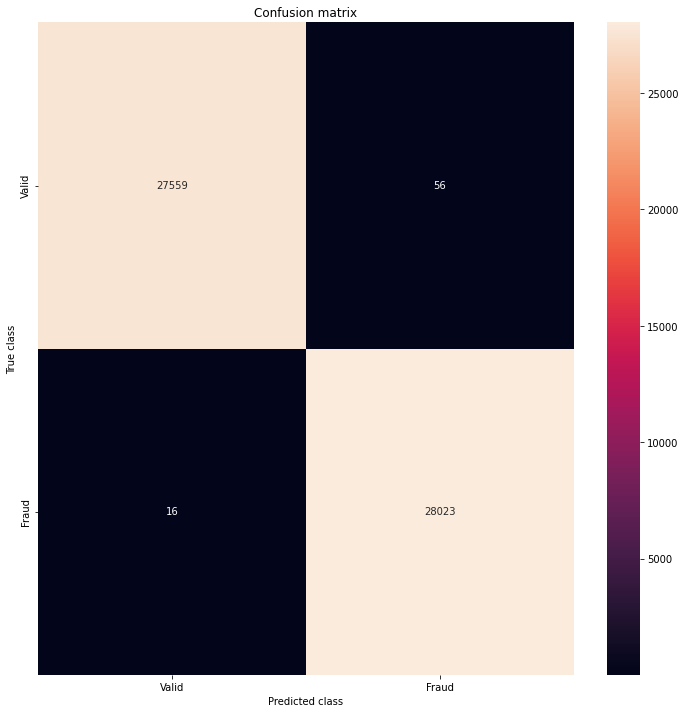

In [113]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred2) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

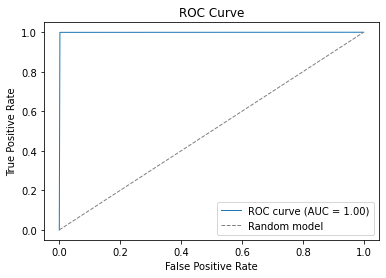

In [114]:

y_pred = dt.predict_proba(X_test)[:, 1] # probability of positive class
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr2, tpr2)

# plot the ROC curve
plt.plot(fpr2, tpr2, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


logistic regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr = LogisticRegression()

In [117]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [118]:
X_test_pred3=lr.predict(X_test)
test_data_accuracy=(accuracy_score(X_test_pred3,y_test))

In [119]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy*100,2),"%")

ACCURACY OF Testing IS :  95.52 %


In [120]:
precision_score(X_test_pred3,y_test)

0.9284211277149684

In [121]:
recall_score(X_test_pred3,y_test)

0.9816728260049777

In [122]:
f1_score(X_test_pred3,y_test)

0.9543046721777223

In [123]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,X_test_pred3))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     27615
           1       0.98      0.93      0.95     28039

    accuracy                           0.96     55654
   macro avg       0.96      0.96      0.96     55654
weighted avg       0.96      0.96      0.96     55654



In [124]:
confusion_matrix(y_test,X_test_pred3)

array([[27129,   486],
       [ 2007, 26032]])

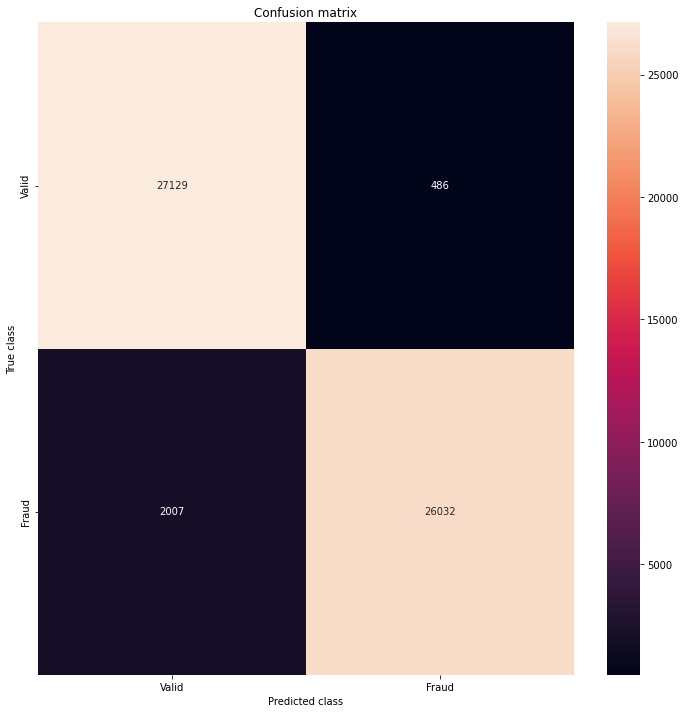

In [125]:
#visulalizing the confusion matrix
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, X_test_pred3) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

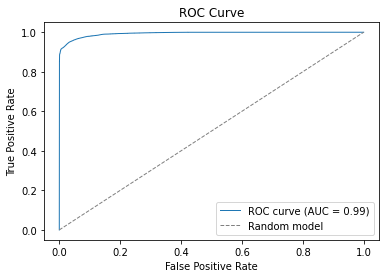

In [126]:

y_pred = lr.predict_proba(X_test)[:, 1] # probability of positive class
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr3, tpr3)

# plot the ROC curve
plt.plot(fpr3, tpr3, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [127]:
print("Logistic Regression Test Accuracy:",accuracy_score(X_test_pred3,y_test)*100)

Logistic Regression Test Accuracy: 95.52053760735976


In [128]:
print("Decision Tree Test Accuracy:",accuracy_score(X_test_pred2,y_test)*100)

Decision Tree Test Accuracy: 99.8706292449779


In [129]:
print("Random forest Test Accuracy:",accuracy_score(X_test_pred,y_test)*100)

Random forest Test Accuracy: 99.99460955187408


In [130]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(X_test_pred3,y_test)*100,
                     accuracy_score(X_test_pred2,y_test)*100,
                     accuracy_score(X_test_pred,y_test)*100
                    ]})

In [131]:
final_data

,Models,ACC
0,LR,95.520538
1,DT,99.870629
2,RF,99.994610


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='ACC'>

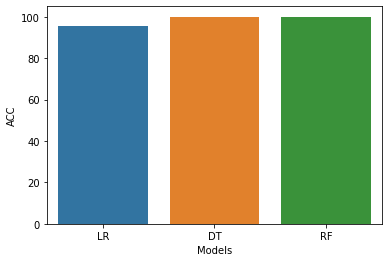

In [132]:
sns.barplot(final_data['Models'],final_data['ACC'])

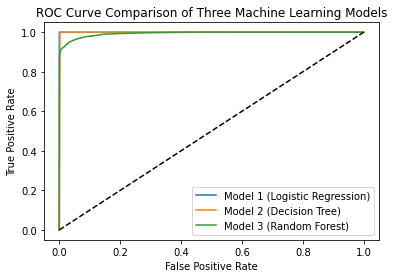

In [133]:

plt.plot(fpr, tpr, label='Model 1 (Logistic Regression)')
plt.plot(fpr2, tpr2, label='Model 2 (Decision Tree)')
plt.plot(fpr3, tpr3, label='Model 3 (Random Forest)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Three Machine Learning Models')
plt.legend(loc='lower right')
plt.show()

Voting Classifier

In [134]:
clf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lr = LogisticRegression()

from sklearn.ensemble import VotingClassifier

In [135]:
voting = VotingClassifier(estimators=[('RF', clf), ('DT', dt), ('LR', lr)],voting='soft')

In [136]:
voting.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('LR', LogisticRegression())],
                 voting='soft')

In [137]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred)*100)


Accuracy 99.94609551874079


Save The Model

In [138]:
rf1=RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [139]:
import joblib

In [140]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [141]:
model=joblib.load("credit_card_model")

In [142]:
pred = model.predict([['-1.359807134','-0.072781173','2.536346738','1.378155224','-0.33832077','0.462387778','0.239598554','0.098697901','0.36378697','0.090794172','-0.551599533','-0.617800856','-0.991389847','-0.311169354','1.468176972','-0.470400525','0.207971242','0.02579058','0.40399296','0.251412098','-0.018306778','0.277837576','-0.11047391','0.066928075','0.128539358','-0.189114844','0.133558377','-0.021053053','-0.287396'
]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [143]:
if pred==0:
    print("Normal Transaction")
else:
    print("fraudlent Transaction")

Normal Transaction


In [144]:
pred = model.predict([['-2.312226542','1.951992011','-1.609850732','3.997905588','-0.522187865','-1.426545319','-2.537387306','1.391657248','-2.770089277','-2.772272145','3.202033207','-2.899907388','-0.595221881','-4.289253782','0.38972412','-1.14074718','-2.830055675','-0.016822468','0.416955705','0.126910559','0.517232371','-0.035049369','-0.465211076','0.320198199','0.044519167','0.177839798','0.261145003','-0.143275875','0'

]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [145]:
if pred==0:
    print("Normal Transaction")
else:
    print("fraudlent Transaction")

fraudlent Transaction
